In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams.update({
    "font.family": "serif",  # use serif/main font for text elements
    "text.usetex": False,     # use inline math for ticks
    "pgf.rcfonts": False,    # don't setup fonts from rc parameters
})

In [8]:
import pp_util
import importlib
importlib.reload(pp_util)
from pathlib import Path

In [3]:
import os
csv_root = "../data/"

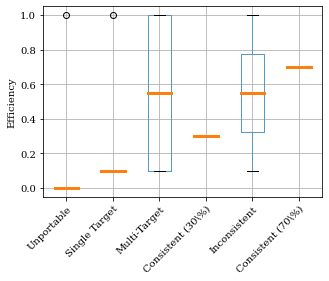

In [9]:
fig = plt.figure(figsize=(5, 3.5))
ax = fig.add_subplot(1,1,1)
app_eff = pp_util.read_effs(os.path.join(csv_root, "synthetic.csv"), skip_plats=True)
pp_util.boxplot(ax, app_eff)
plt.savefig("box_plot_synthetic.pdf", bbox_inches="tight")

NameError: name 'Path' is not defined

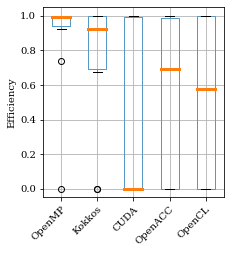

In [5]:
fig = plt.figure(figsize=(11, 3.5))
for i, appfile in enumerate(["babelstream.csv", "cloverleaf.csv", "neutral.csv"]):
    ax = fig.add_subplot(1,3,i+1)
    effs = pp_util.get_effs(os.path.join(csv_root, appfile), throughput="babelstream" in appfile)
    pp_util.boxplot(ax, list(effs.items()))
    plt.title(Path(appfile).stem)
plt.tight_layout(pad=1.4,w_pad=1.5, h_pad=0.5)
plt.savefig("box_plot_tiled.pdf", bbox_inches="tight")